Import all libraries and load in the numpy arrays

In [7]:
import pickle
import time
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import normalize, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
# X_train= pickle.load(open("X_train.pickle","rb"))
# y_train = pickle.load(open("y_train.pickle","rb"))
# X_train= pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/cropped256/X_train.pickle","rb"))
# y_train = pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/cropped256/y_train.pickle","rb"))

Normalize data

In [8]:
X_train=X_train/255.0
y_train = to_categorical(y_train)

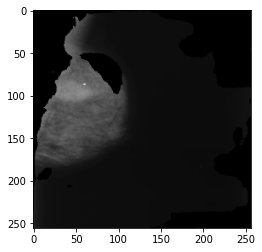

In [3]:
for image in X_train:
    plt.imshow(image)
    plt.show()
    break

In [11]:
import matplotlib.pyplot as plt
# datagen = ImageDataGenerator(
#     width_shift_range=0.2,
#     rotation_range=20,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2,
#     shear_range=0.8,
#     brightness_range=[0.9,1.2],
#     fill_mode='reflect',
#     cval=0.0,
#     # rescale=1./255,
#     preprocessing_function=preprocess_input,
#
# )
dirpath='C:/Users/moham/Desktop/Data/breastImages'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


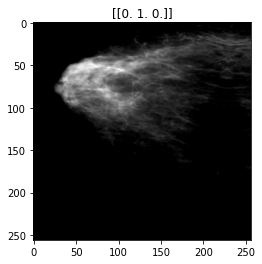

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


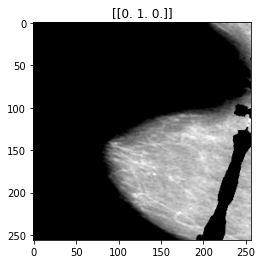

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


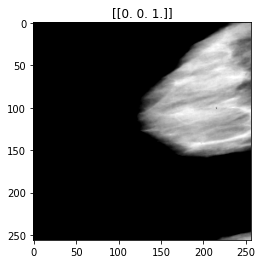

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


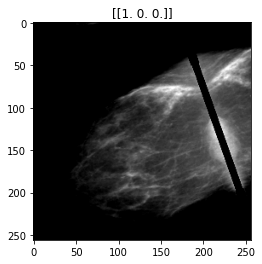

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


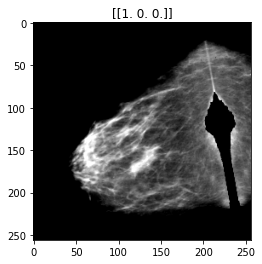

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


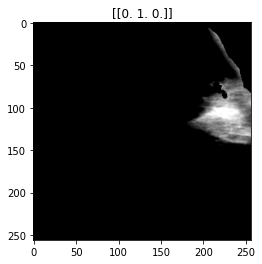

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


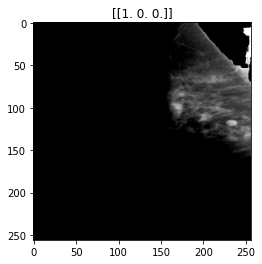

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


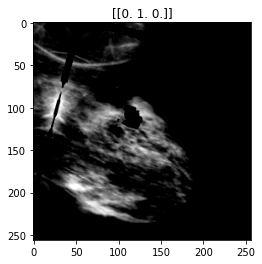

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


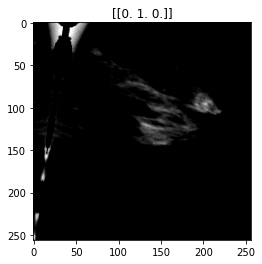

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


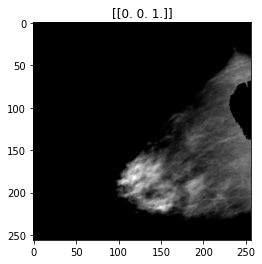

In [12]:
i = 0
for xbatch,ybatch in datagen.flow(X_train,y_train, batch_size=1):
    plt.imshow(xbatch[0])
    plt.title(ybatch)
    plt.show()
    i+=1
    if i ==10:
        break

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model=InceptionV3()
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 149, 149, 32) 96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 149, 149, 32) 0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
# X_train.shape[1:]
# load model without classifier layers
model = InceptionV3(include_top=False, input_shape=(250,250,3),weights="imagenet")
# add new classifier layers
model.trainable=False
flat1 = Flatten()(model.layers[-1].output)
dense1 = Dense(256, activation='relu')(flat1)
drop = Dropout(0.25)(dense1)
dense2 = Dense(128,activation='relu')(drop)
drop2 = Dropout(0.25)(dense2)
output = Dense(3, activation='softmax')(drop2)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 127, 127, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 127, 127, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [12]:
model.compile(loss="categorical_crossentropy",
             optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
NAME = "InceptionV3-test-2-{}".format(int(time.time()))
EarlyStop=EarlyStopping(patience=5,monitor='val_loss')
checkpoints=ModelCheckpoint(filepath=f'ModelCheckPoints/{NAME}.h5', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='DeepModels/{}'.format(NAME))
callbacks=[EarlyStop,checkpoints,tensorboard]
history=model.fit(datagen.flow(X_train, y_train, batch_size=16,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=16, subset='validation'),
         steps_per_epoch=len(X_train) / 29, epochs=10,callbacks=[callbacks])
# history=model.fit(train_generator,
#         steps_per_epoch=len(train_generator),
#         epochs=10,
#         validation_data=validation_generator,
#         validation_steps=len(validation_generator),
#                   callbacks=[callbacks])

Epoch 1/10
116/116 [==============================] - 43s 311ms/step - loss: 2.8874 - accuracy: 0.3888 - val_loss: 1.0661 - val_accuracy: 0.4345